# Data Exploration

## Prepare notebook

Import libraries for plotting, data cleaning, weighting observations, and regular expressions 

In [1]:
from matplotlib import rcParams  # plotting
import numpy as np  # computing
import pandas as pd  # data analysis
import pickle  # serialisation
import re  # regular expressions
import seaborn as sns  # plotting
import matplotlib.pyplot as plt  # plotting
import weightedcalcs as wc  # weighting obesrvations in survey
import warnings
warnings.filterwarnings("ignore")

Set plotting font to serif

In [2]:
rcParams['font.family'] = 'serif'

Import functions from source code for feature selection, plotting, data exploration

In [3]:
import sys
import os
sys.path.append('../src/features')
from build_features import filter_col_with_regex
sys.path.append('../src/visualization')
from visualize import plot_bar, plot_stacked, count_res

Load clean data or "unpickle"

In [4]:
with open('../data/processed/df.pickle', 'rb') as file:
    df = pickle.load(file)

Set up function for weighting observations using the weights in the survey data

In [5]:
weight = df['weight']
calc = wc.Calculator('weight')

## Explore the presvote16post_2016 attribute

This attribute is the survey response to "Who did you vote for in the election for President?"

Calculate weighted distribution of responses for presvote16post_2016 

In [10]:
pres_freq = calc.distribution(df, 'presvote16post_2016').round(3)

Create list of president names that correspond to categories and print name with vote amount received

In [12]:
pres_list = ['Clinton', 'Trump', 'Johnson', 'Stein',
             'McMullin', 'Other', 'Did not vote', 'No Response']

for idx, val in enumerate(pres_freq):
    print(pres_list[idx], val)

Clinton 0.406
Trump 0.399
Johnson 0.027
Stein 0.012
McMullin 0.002
Other 0.016
Did not vote 0.008
No Response 0.13


Visualize weighted distribution of responses across eight classes 

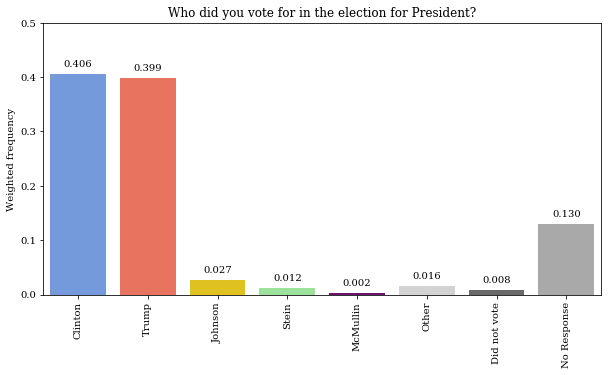

In [8]:
x = pres_list
y = pres_freq
palette = ['cornflowerblue', 'tomato', 'gold', 'lightgreen',
           'purple', 'lightgrey', 'dimgrey', 'darkgray']
title = 'Who did you vote for in the election for President?'
pres_plt = plot_bar(x, y, palette, title, x)
for bar in pres_plt.patches:  # add value to top of each bar
    pres_plt.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2.,
                                                        bar.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Feature engineering of presvote16_post

Calculate weighted distribution of responses to "who did you vote for in the election for President?" across three classes

In [ ]:
pres_cat_list = ['Clinton', 'Trump', 'Other behavior']
pres_cat_freq = calc.distribution(df, 'vote_3cat').round(3)

for ind, val in enumerate(pres_cat_freq):
    print(pres_cat_list[ind], val)

Visualize weighted distribution of responses across three classes 

In [ ]:
x = pres_cat_list
y = list(pres_cat_freq)
title = 'Who did you vote for in the election for President?'
xlabels = pres_cat_list
palette_sm = [palette[0], palette[1], palette[-2]]
cat_plt = plot_bar(x, y, palette_sm, title, xlabels)

## Explore potential features for predicting vote_3cat or presvote16post_2016

Which attributes are correlated with presvote16post_2016?

In [ ]:
df.corr()['presvote16post_2016'].sort_values(ascending=False).head(10)[1:9]

Which attributes are correlated with vote_3cat?

In [ ]:
df.corr()['vote_3cat'].sort_values(ascending=False).head(10)[1:9]

Both lists show that the survey questions that ask about party affiliation, approval of Obama, and ticket options (e.g. Clinton/Cruz) coorelate the most strongly with the target (vote_3cat/presvote16_post). 

Now that I compared the three category target versus eight, I will use the three category target attribute, vote_3cat, moving forward. 

Next, I look at other attributes that might be used as features to create a predictive model by topic area<br><br>

## What is the relationship between attributes related to community engagement and vote_3cat?

Using the survey guide, select attributes to represent community engagement and generate lists of the attribute names

In [ ]:
col_list = []
for i in range(1, 18):
    col = f'volunteerorg2_{i}_baseline'
    col_list.append(col)

col2_list = ['CIVIC_PARTICIPATION_2016',
             'pew_churatd_2016',
             'volunteer_baseline',
             'volunteerf_baseline',
             'volunteernum_baseline'
             ]

Print the number of community engagement attributes used and show the top of the dataframe

In [ ]:
target = ['vote_3cat']
df_comm_engag = df[(col_list + col2_list + target)]
print('number of community engagement attributes:', len(col_list + col2_list))
df_comm_engag.head()

Check how strongly these attributes correlate with the target

In [ ]:
df_comm_engag.corr()['vote_3cat'].sort_values(ascending=False).head(10)[1:10]

## What is the relationship between attributes related to religion and vote_3cat?

Using the survey guide, select attributes to represent the importance of religion and create a list of the attribute names

In [ ]:
col_list = ['pew_churatd_2016',
            'pew_religimp_2016',
            'pew_bornagain_2016',
            'pew_prayer_2016',
            'religpew_2016'
            ]

Print the number of religion attributes used and show the top of the dataframe with just the target and religion features

In [ ]:
print('number of religion features:', len(col_list))
df_religion = df[(col_list + target)]
df_religion.head()

Check how strongly these attributes correlate with the target

In [ ]:
df_religion.corr()['vote_3cat'].sort_values(ascending=False).head(10)[1:10]

## What is the relationship between issue importance attributes and vote_3cat?

Set regex pattern to the naming convention of the attributes that ask about issue importance

In [ ]:
pattern = '(imiss_).{1}(_2016)'

Call function from src folder to return list of column names. Then return dataframe with just issue columns plus target

In [ ]:
col_list = filter_col_with_regex(df, pattern)
df_issue = df[col_list + target]

When we group by 2016 vote, how many people rated climate change very important (1), somewhat important (2), not very important (3), unimportant (4), and no response (8)?

In [ ]:
df.groupby('vote_3cat').imiss_l_2016.value_counts()

Print the number of issue importance attributes (Climate, Healthcare, Abortion, Size of government, Social Security, Medicare, Taxes, Immigration, etc.)

In [ ]:
print('number of issue features:', len(col_list))
df_issue = df[(col_list + target)]
df_issue.head()

Check how strongly these attributes correlate with the target

In [ ]:
df_issue.corr()['vote_3cat'].sort_values(ascending=False).head(10)

imiss_l_2016 = climate change <br>
imiss_g_2016 = gay rights <br> 
imiss_y_2016 = gender equality <br>
imiss_x_2016 = racial equality <br>

Check the tail for strength of negative correlations

In [ ]:
df_issue.corr()['vote_3cat'].sort_values(ascending=False).tail(10)

Plot heatmap of issue importance correlations

In [ ]:
corr = df[col_list].corr()
figsize=(20,9)
sns.heatmap(corr)

### What is the relationship between ratings of issue importance for climate change and vote?

Add back the column of weights for each observation to the dataframe

In [ ]:
df_issue = df_issue.join(weight)

Group dataframe by vote choice 

In [ ]:
grouped = df_issue.groupby(['vote_3cat'])

Take a subset of the data that includes only those who voted for Trump or Hilary

In [ ]:
df_bins = df_issue.loc[(df.vote_3cat == 1)| (df.vote_3cat == 2)]
grouped_bins = df_bins.groupby('vote_3cat')

Look at weighted distribution of responses to ratings of the issue importance of climate change

In [ ]:
clm_wgtd = calc.distribution(grouped_bins, 'imiss_l_2016').round(3)
clm_wgtd

Create stacked bar plots of weighted response frequency by target class for climate change

In [ ]:
data = clm_wgtd
title = 'Climate change'
plot_stacked(data, title)
plt.show()

### What is the relationship between ratings of issue importance for the Budget deficit and vote?

View weighted responses to importance of the Budget deficit

In [ ]:
bdgt_wgtd = calc.distribution(grouped, 'imiss_p_2016').round(3)
bdgt_wgtd

Create stacked bar plots of weighted response frequency by target class for the Budget deficit

In [ ]:
title = 'The Budget deficit' 
plot_stacked(bdgt_wgtd, title)
plt.show()

### What is the relationship between ratings of issue importance for abortion and vote?

Print weighted responses to importance of abortion

In [ ]:
abrt_wgtd = calc.distribution(grouped_bins, 'imiss_t_2016').round(3)
print(abrt_wgtd)

Create stacked bar plots of weighted response frequency by target class for abortion

In [ ]:
palette_short = ['cornflowerblue','tomato','lightgrey']
fig, ax1 = plt.subplots(1,1,sharex=True, sharey=True, figsize=(8,6))
abrt_wgtd.T.plot(kind='bar', stacked=False, color=palette_short, ax=ax1)
ax1.set_title('Abortion', y=1.1, fontsize=18)
N = 5 
ind = np.arange(N)
x_ticks = ('Very Important','Somewhat Important','Not very Important', 'Unimportant', 'No Response')
plt.xticks(ind, x_ticks, fontsize=9, rotation='horizontal')
frame1 = plt.gca()
ax1.set_ylim(0,.5)
ax1.set_yticklabels([0, 10, 20, 30, 40, 50], fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Percentage', fontsize=12)
ax1.set_xlabel('')

plt.savefig('../reports/figures/three_barplts.png')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
labels=['\'16 Clinton Voters', '\'16 Trump Voters']
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=16, frameon=False)
plt.savefig('../reports/figures/abortion-by-party.png')
plt.show()

### What is the relationship between ratings of issue importance for size of gov and vote?

Print weighted responses to importance of size of government

In [ ]:
szgv_wgtd = calc.distribution(grouped_bins, 'imiss_u_2016').round(3)
print(szgv_wgtd)

Create stacked bar plots of weighted response frequency by target class for size of government

In [ ]:
plot_stacked(szgv_wgtd, title)
plt.show()

## Get weighted distribution of each issue and assign to variable 

For all the rest of the attributes, get distribution and assign to a variable

In [ ]:
crm_wgtd = calc.distribution(grouped, 'imiss_a_2016').round(3)
ecn_wgtd = calc.distribution(grouped, 'imiss_b_2016').round(3)
imm_wgtd = calc.distribution(grouped, 'imiss_c_2016').round(3)
env_wgtd = calc.distribution(grouped, 'imiss_d_2016').round(3)
rlg_wgtd = calc.distribution(grouped, 'imiss_e_2016').round(3)
terr_wgtd = calc.distribution(grouped, 'imiss_f_2016').round(3)
gay_wgtd = calc.distribution(grouped, 'imiss_g_2016').round(3)
ed_wgtd = calc.distribution(grouped, 'imiss_h_2016').round(3)
mdlv_wgtd = calc.distribution(grouped, 'imiss_i_2016').round(3)
hlthcr_wgtd = calc.distribution(grouped, 'imiss_j_2016').round(3)
mny_wgtd = calc.distribution(grouped, 'imiss_k_2016').round(3)
soc_wgtd = calc.distribution(grouped, 'imiss_m_2016').round(3)
inf_wgtd = calc.distribution(grouped, 'imiss_n_2016').round(3)
jbs_wgtd = calc.distribution(grouped, 'imiss_o_2016').round(3)
pov_wgtd = calc.distribution(grouped, 'imiss_q_2016').round(3)
txs_wgtd = calc.distribution(grouped, 'imiss_r_2016').round(3)
mdcr_wgtd = calc.distribution(grouped, 'imiss_s_2016').round(3)
rceql_wgtd = calc.distribution(grouped, 'imiss_x_2016').round(3)
gdreql_wgtd = calc.distribution(grouped, 'imiss_y_2016').round(3)

List strings of issues for titles

In [ ]:
issues = ['Crime', 'The Economy',
          'Immigration', 'The Environment', 'Religious Liberty', 'Terrorism', 
          'Gay Rights', 'Education', 'Family and Medical Leave', 
          'Health Care', 'Money in Politics', 'Climate Change', 
          'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit',
          'Poverty', 'Taxes', 'Medicare',
          'Abortion', 'The Size of Government', 'Racial Equality', 'Gender Equality','', '', '', '', '']

## Plot all issues in stacked bar 

In [ ]:
for ind, col in enumerate(col_list):
    freq = calc.distribution(grouped, col).round(3)
    iss_plt = plot_stacked(freq, issues[ind])

## Create one plot with 23 subplots of issues

Create new issues list for formatting edits 

In [ ]:
issues = ['Crime', 'The\nEconomy',
          'Immigration', 'The\nEnvironment', 'Religious\nLiberty', 'Terrorism', 
          'Gay\nRights', 'Education', 'Family and\nMedical\nLeave', 
          'Health\nCare', 'Money\nin\nPolitics', 'Climate\nChange', 
          'Social\nSecurity', 'Infrastructure\nInvestment', 'Jobs', 'The\nBudget\n Deficit',
          'Poverty', 'Taxes', 'Medicare',
          'Abortion', 'The\nSize of\nGovernment', 'Racial\nEquality', 'Gender\nEquality','']

Plot each issue 

In [ ]:
fig, ax = plt.subplots(figsize=(50,20), ncols=12, nrows=2)
[axi.set_axis_off() for axi in ax.ravel()]

crm_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][0], legend=None)
ecn_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][1], legend=None)
imm_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][2], legend=None)
env_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][3], legend=None)
rlg_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][4], legend=None)
terr_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][5], legend=None)
gay_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][6], legend=None)
ed_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][7], legend=None)
mdlv_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][8], legend=None)
hlthcr_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][9], legend=None)
mny_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][10], legend=None)
clm_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[0][11], legend=None)
soc_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[1][0],legend=None)
inf_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[1][1], legend=None)
jbs_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[1][2], legend=None)
bdgt_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[1][3], legend=None)
pov_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[1][4], legend=None)
txs_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[1][5], legend=None)
mdcr_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[1][6], legend=None)
abrt_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[1][7], legend=None)
szgv_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[1][8], legend=None)
rceql_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[1][9], legend=None)
gdreql_wgtd.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax[1][10], legend=None)
[axi.set_title(label=issues[idx], fontdict={'fontsize':30}, y=.45, x=.59) for idx, axi in enumerate(ax.ravel())]
[axi.set_ylim([0,3]) for axi in ax.ravel()]

plt.show()

Compare plots of size of government and climate change to show issues that Trump voters care about versus Clinton voters care about 

In [ ]:
palette = ['cornflowerblue','tomato','lightgrey']
x_ticks = ('Very Important','Somewhat Important','Not Very Important', 'Unimportant', 'No Response')
title = ['Climate Change', 'Size of Government']
xlabel = ''
ylabel = 'Frequency'
fig, axes = plt.subplots(1,2,sharex=True, sharey=True, figsize=(10,7))
distributions = [clim_wgtd, szgv_wgtd]
spine = ['top', 'right']

for idx, i in enumerate(distributions):
    i.T.plot(kind='bar', stacked=False, color=palette, ax=axes[idx])
    
for idx, ax in enumerate(axes):
    ax.set_title(title[idx])
    ind = np.arange(N)
    plt.xticks(ind, x_ticks)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for sp in spine:
        ax.spines[sp].set_visible(False)

handles, labels = axes[1].get_legend_handles_labels()
labels = ('\'16 Clinton Voters', '\'16 Trump Voters')
axes[1].legend(handles, labels)
axes[0].get_legend().remove()
plt.show()

## Do Trump Voters and Clinton voters respond in similar ways to the rating scales? 

Subset issue dataframe into the three classes

In [ ]:
df_clint = df_issue.loc[df_issue.vote_3cat == 1]
df_trump = df_issue.loc[df_issue.vote_3cat  == 2]
df_other_behav = df_issue.loc[df_issue.vote_3cat  == 3]
cat_df_list = [df_clint, df_trump, df_other_behav]

Reset the index, drop the old index, drop vote category and weight columns, print the number of attributes 

In [ ]:
for df in cat_df_list:
    df.reset_index(drop=True, inplace=True)
    df.drop(columns=['vote_3cat','weight'], inplace=True)
    print(len(df.columns))

Check that index has been reset

In [ ]:
df_other_behav.head()

Call count function and save as variable and then make a list of those variables

In [ ]:
clint_count = count_res(df_clint)
trump_count = count_res(df_trump)
other_behav_count = count_res(df_other_behav)
counts = [clint_count, trump_count, other_behav_count]

Check that the number of likert scale responses is equal to number expected per candidate

In [ ]:
for idx, i in enumerate(cat_df_list):
    print(i.shape[0]*23 == sum(counts[idx].values()))

Plot counts for each likert scale category for Clinton, Trump, and other behavior

In [ ]:
title = 'Response counts by vote'
ylabel = 'Count'
width = 0.25
b1= np.arange(5)
b2 = [x + bar_width for x in b1]
b3 = [x + bar_width for x in b2]
plt.bar(b1, counts[0].values(), width=width, color=palette[0])
plt.bar(b2, counts[1].values(), width=width, color=palette[1])
plt.bar(b3, counts[2].values(), width=width, color=palette[-1])
plt.title(title)
plt.xticks([r + bar_width for r in range(len(bar_clint))],
           x_ticks, rotation='vertical')
plt.ylabel(ylabel)
plt.show()